In [34]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [35]:
class AgentState(TypedDict):
    skills: list[str]
    name: str
    age: int
    final: str

def greet_user(state: AgentState) -> AgentState:
    state['final'] = f"Hey {state['name']}, Welcome to the system! "
    return state

def insert_age(state: AgentState) -> AgentState:
    state['final'] = state['final'] + f"You are {state['age']} years old."
    return state

def insert_skills(state: AgentState) -> AgentState:
    skillset = ""
    skillset = ", ".join(state['skills'])
    state['final'] = state['final'] + f" You have skills in: {skillset}"
    return state

In [36]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greet_user)
graph.set_entry_point("greeting")
graph.add_node("insert_age", insert_age)
graph.add_node("insert_skills", insert_skills)
graph.add_edge("greeting", "insert_age")
graph.add_edge("insert_age", "insert_skills")
graph.set_finish_point("insert_skills")
app = graph.compile()

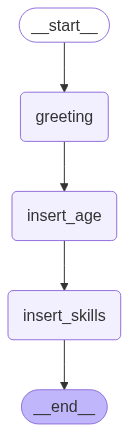

In [37]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [38]:
result = app.invoke({"skills": ["Python", "JavaScript"], "name": "Alice", "age": 30})

In [39]:
result['final']

'Hey Alice, Welcome to the system! You are 30 years old. You have skills in: Python, JavaScript'